In [2]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 02bda1e5-0537-481e-9261-b705b85930bd

In [3]:
# Premade libraries
import cv2
import time
import math
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point, LineString

# Homemade functions
import Vision.vision as vs
import robot as rbt
import Global_Navigation.global_navigation as glb
import Motion_Control.thymio_control as ctrl

In [10]:
def get_angle2goal(geometry, goal):
    """

    Compute the angle between thecurent orientation of the tymio and its next goal
    :return: beta the angle btw goal/crt orientation
    """
    beta = math.atan2(goal[1] - geometry[0][1], goal[0] - geometry[0][0])
    if beta - geometry[1] < -np.pi:
        beta = -(beta - geometry[1] + np.pi)
    elif beta - geometry[1] > np.pi:
        beta = -(beta - geometry[1] - np.pi)
    else:
        beta = beta - geometry[1]
    return beta

def get_correct_orientation(beta, node, speed, tol):
    if abs(beta) < tol:
        #print("right angle")
        #ctrl.stop_motors(node)
        return(True)
    if beta < 0 :
        ctrl.set_motor_speed(-speed, speed, node)
        return(False)
    elif beta > 0:
        
        ctrl.set_motor_speed(speed, -speed, node)
        return(False)
    
def test_sensors(node,client, tolerance):
    sensor = ctrl.get_prox_sensors(node,client)
    for i in range(5):
        if sensor[i] > tolerance:
             return False 
    return True
    
def get_distance(pos, goal, tol, speed, node):
    dist = np.linalg.norm((goal[0]-pos[0], goal[1]-pos[1]))
    if dist < tol:
        ctrl.stop_motors(node)
        return True
    else:
        spLeft = speed
        spRight = speed
        for i in range(5):
            a = 4-i
            sensor = ctrl.get_prox_sensors(node,client)
            spLeft += sensor[i] * obstSpeedGain[i] // 100
            spRight += sensor[i] * obstSpeedGain[a]//100
        ctrl.set_motor_speed(spRight, spLeft, node)
        if(test_sensors(node, client, 3000)):
            ctrl.set_motor_speed(speed, speed, node)
            #aw(client.sleep(0.5))
        return False
    

        

In [13]:
cap = cv2.VideoCapture(1)
img = vs.get_image(cap)
margin = 10
speedGain = 2     # gain used with ground gradient
obstSpeedGain = np.array([6,4,-2,-6,-8])
thymio = rbt.RobotNav()

[[[123.5 167.5  35.8]
  [187.5 194.5  23.1]]]
ok


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 60.01it/s]


[Point(156.00, 181.00), Point(602.00, 274.00)]
fin state
[[[123.5 167.5  35.8]
  [187.5 194.5  23.1]]]
ok
(124, 168)
(188, 194)
[[[110.5 181.5  38.3]
  [174.5 155.5  17.1]]]
ok
(110, 182)
(174, 156)
[[[102.5 178.5  31.6]
  [180.5 153.5  18.8]
  [173.5 192.5  21.1]]]
revoir hough circles para
[[[109.5 177.5  31.6]
  [179.5 154.5  20. ]]]
ok
(110, 178)
(180, 154)
[[[107.5 185.5  40.5]
  [181.5 160.5  18.2]]]
ok
(108, 186)
(182, 160)
[[[111.5 172.5  32.7]
  [182.5 169.5  23. ]]]
ok
(112, 172)
(182, 170)
[[[113.5 188.5  45. ]
  [106.5 169.5  32.7]
  [181.5 170.5  16.9]]]
revoir hough circles para
[[[113.5 169.5  31.6]
  [182.5 174.5  17.2]]]
ok
(114, 170)
(182, 174)
avance
[[[163.5 186.5  40.5]
  [225.5 191.5  17.4]]]
ok
(164, 186)
(226, 192)
avance
[[[250.5 188.5  33.8]
  [326.5 205.5  18.8]]]
ok
(250, 188)
(326, 206)
avance
[[[345.5 206.5  33. ]
  [419.5 222.5  20.7]]]
ok
(346, 206)
(420, 222)
avance
[[[436.5 227.5  36.9]
  [514.5 246.5  21.5]]]
ok
(436, 228)
(514, 246)
avance
[[[529.5 2

[[[186.5 143.5  33.2]
  [150.5 186.5  19.6]]]
ok
(186, 144)
(150, 186)
[[[155.5 181.5  18.5]]]
revoir hough circles para
[[[147.5 183.5  16.7]
  [198.5 143.5  23.2]]]
ok
(198, 144)
(148, 184)
[[[187.5 137.5  32.4]
  [152.5 180.5  19.3]
  [181.5 192.5  22.4]]]
revoir hough circles para
[[[192.5 135.5  28.2]
  [146.5 177.5  19.1]]]
ok
(192, 136)
(146, 178)
[[[191.5 148.5  41.6]
  [145.5 173.5  18.8]]]
ok
(192, 148)
(146, 174)
[[[142.5 169.5  19. ]]]
revoir hough circles para
[[[191.5 140.5  29.4]
  [139.5 170.5  18.3]]]
ok
(192, 140)
(140, 170)
[[[191.5 139.5  31.6]
  [135.5 162.5  14.4]]]
ok
(192, 140)
(136, 162)
[[[136.5 159.5  19.9]
  [153.5 186.5  30. ]]]
ok
(154, 186)
(136, 160)
[[[149.5 174.5  35. ]
  [186.5 141.5  30.5]
  [134.5 156.5  22.1]]]
revoir hough circles para
[[[131.5 150.5  18.3]
  [151.5 177.5  22.4]]]
ok
(152, 178)
(132, 150)
[[[193.5 145.5  37. ]]]
revoir hough circles para
[[[196.5 147.5  37.2]]]
revoir hough circles para
None
revoir hough circles para
[[[135.5 133.

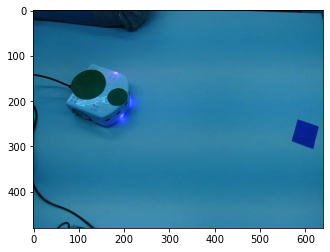

In [14]:
i = 0 #step vis graph
path = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if thymio.get_state() == 0:
        thymio.initialisation_step(frame, margin, False)
        thymio.set_state(1)
        path = thymio.get_path('real')
        print("fin state")
    
    if thymio.get_state() == 1:  #motion control commence
        pos_thy, two_centres, test_detect = vs.detect_start1(frame, False)  #recupere pos thymio, #test_detect bool a false si thymio pas detetc
        frame = glb.draw_path(frame, thymio.get_path('real')) #dessine chemin du thymio new fenetre
        path_img = thymio.get_path('img')
        if test_detect:
            frame = glb.draw_thymio(frame, path_img)   # dessine point thymio new fenetre
        #frame = glb.draw_thymio(frame, path_kalman)   # dessine point thymio new fenetre
        if test_detect:
            thymio.update_position_cam(two_centres)  #update pos thymio et angle dans la classe robot
        """
        else:
            thymio.update_position_kalman()
        """
        if len(path) > (i+1):
            next_goal = (path[i+1].x,path[i+1].y) 
            angle = get_angle2goal(thymio.get_geometry(), next_goal)  #angle entre thymio et point
            get_correct_orientation(angle, node, 50, 0.2)
            if get_correct_orientation(angle, node, 50, 0.2):
                print("avance")
                get_distance(thymio.get_geometry()[0], next_goal, 30, 200, node)
                if get_distance(thymio.get_geometry()[0], next_goal, 30, 200, node):
                    i = i + 1
                    if i == (len(path)-1):
                        thymio.set_state(2)
                        ctrl.stop_motors(node)
                        print("arrivee")
                        print(thymio.get_state())
                        break      
        
    cv2.imshow('frame',frame)     
    if cv2.waitKey(1) == ord('q'):
        ctrl.stop_motors(node)
        break
        
cap.release()
cv2.destroyAllWindows()

In [16]:
ctrl.stop_motors(node)

In [8]:
def avoidance(node, client):
    sensor = ctrl.get_prox_sensors(node,client)
    

In [25]:
cap.release()
cv2.destroyAllWindows()

[[[164.5 172.5  36.6]
  [230.5 224.5  18.2]]]
ok


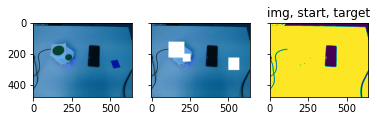

((197.0, 198.0), (535.0, 264.0), [[array([648.0805, 299.008 ], dtype=float32), array([598.59174, 397.23392], dtype=float32), array([622.26984, 348.82208], dtype=float32), array([631.1923 , 327.89932], dtype=float32)], [array([  3.2706385, 215.22668  ], dtype=float32), array([ 18.30791, 336.41025], dtype=float32), array([  1.9690068, 446.89935  ], dtype=float32), array([  1.0276295, 347.14984  ], dtype=float32)], [array([379.49417, 143.66446], dtype=float32), array([395.41476, 146.81915], dtype=float32), array([411.56488, 145.9689 ], dtype=float32), array([429.7781 , 143.16815], dtype=float32), array([428.57886, 151.62352], dtype=float32), array([430.60236, 183.49132], dtype=float32), array([429.17816, 247.50604], dtype=float32), array([433.58926, 283.71942], dtype=float32), array([424.24524, 274.32874], dtype=float32), array([436.4668 , 293.27103], dtype=float32), array([404.86624, 281.9823 ], dtype=float32), array([391.49432, 284.59064], dtype=float32), array([379.69073, 280.72028], d

In [8]:
cap = cv2.VideoCapture(1)
img = vs.get_image(cap)
margin = 10
speedGain = 2     # gain used with ground gradient
obstSpeedGain = np.array([6,4,-2,-6,-8])


data = vs.transmit_data(img, True, margin)
print(data)
#img = cv2.circle(img, (int(path[i][0]), int(path[i][1])), int(3), (0, 0, 255), 2)

cv2.imshow('frame',img)  
cap.release()


In [7]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    center = vs.detect_start1(frame, False)
    if center[2]:
        frame = cv2.circle(frame, (int(center[0][0]), int(center[0][1])), int(3), (0, 0, 255), 2)
    
    cv2.imshow('frame',frame)     
    if cv2.waitKey(1) == ord('q'):
        ctrl.stop_motors(node)
        break
        
cap.release()
cv2.destroyAllWindows()

[[[194.5 214.5  37.8]
  [265.5 217.5  18.8]]]
ok
[[[199.5 213.5  38.6]
  [269.5 219.5  18.8]]]
ok
[[[194.5 214.5  37.8]
  [269.5 219.5  18.8]]]
ok
[[[202.5 216.5  31.6]
  [269.5 220.5  19.9]]]
ok
[[[202.5 216.5  31.6]
  [270.5 216.5  20.2]]]
ok
[[[202.5 216.5  31.6]
  [269.5 219.5  19.4]]]
ok
[[[201.5 217.5  36.9]
  [268.5 218.5  17.7]]]
ok
[[[202.5 216.5  31.6]
  [265.5 217.5  18.8]]]
ok
[[[197.5 216.5  35.8]
  [269.5 219.5  18.8]]]
ok
[[[202.5 216.5  31.6]
  [269.5 219.5  19. ]]]
ok
[[[202.5 216.5  31.6]
  [269.5 219.5  18.8]]]
ok
[[[198.5 218.5  36. ]
  [269.5 219.5  18.8]]]
ok
[[[202.5 216.5  31.6]
  [266.5 215.5  20.7]]]
ok
[[[202.5 216.5  31.6]
  [269.5 219.5  22.9]]]
ok
[[[201.5 222.5  41.4]
  [265.5 217.5  19.1]]]
ok
[[[202.5 216.5  31.6]
  [265.5 217.5  18.8]]]
ok
[[[201.5 217.5  36.9]
  [265.5 217.5  18.8]]]
ok
[[[201.5 222.5  41.4]
  [269.5 218.5  18.3]]]
ok
[[[203.5 215.5  34.4]
  [269.5 219.5  19.1]]]
ok
[[[202.5 216.5  31.6]
  [265.5 217.5  18.8]]]
ok
[[[202.5 216.5  31.6

ok
[[[399.5 272.5  41.6]
  [470.5 265.5  21.3]]]
ok
[[[399.5 271.5  36.9]
  [472.5 263.5  19.4]]]
ok
[[[400.5 268.5  38. ]
  [471.5 267.5  19.3]]]
ok
[[[398.5 272.5  41.6]
  [470.5 268.5  20.2]]]
ok
[[[400.5 268.5  37.7]
  [472.5 263.5  19.4]]]
ok
[[[399.5 272.5  41.6]
  [471.5 267.5  19.3]]]
ok
[[[399.5 272.5  41.6]
  [471.5 267.5  19.6]]]
ok
[[[400.5 268.5  37.7]
  [471.5 265.5  21.6]]]
ok
[[[401.5 269.5  37.7]
  [471.5 267.5  19.3]]]
ok
[[[399.5 271.5  36.9]
  [471.5 265.5  21.6]]]
ok
[[[399.5 272.5  41.6]
  [470.5 265.5  21.3]]]
ok
[[[399.5 272.5  41.6]
  [470.5 265.5  21.3]]]
ok
[[[399.5 272.5  41.6]
  [472.5 267.5  19.9]]]
ok
[[[399.5 272.5  41.4]
  [471.5 265.5  21.6]]]
ok
[[[398.5 272.5  41.6]
  [470.5 265.5  21.3]]]
ok
[[[399.5 272.5  41.6]
  [471.5 267.5  19.3]]]
ok
[[[400.5 268.5  37.8]
  [471.5 265.5  21.6]]]
ok
[[[399.5 272.5  41.6]
  [471.5 267.5  19.3]]]
ok
[[[399.5 271.5  36.9]
  [471.5 267.5  19.3]]]
ok
[[[399.5 272.5  41.6]
  [472.5 267.5  19.9]]]
ok
[[[403.5 270.5  3

In [17]:
A = (10, 15)
B = (23, 45)
A = np.array(A)
B = np.array(B)

C = (A+B)/2
print(C)

[16.5 30. ]
